<a href="https://colab.research.google.com/github/SophieShin/CLA3109_class/blob/main/practice_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 데이터 전처리

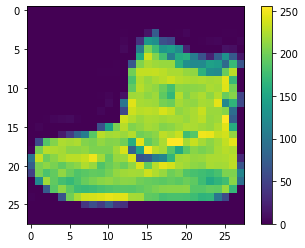

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

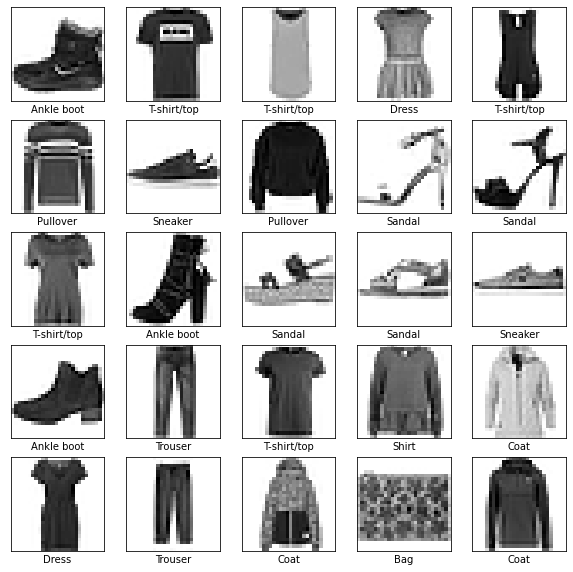

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<img src="https://github.com/keai-kaist/SEP532-2022-Spring/blob/master/Practice_1/imgs/flatten.png?raw=true" align="center" width="600"/>

이미지 형식을 2차원 배열(28 x 28 픽셀)에서 784(28 * 28)의 1차원 배열로 변환합니다. 이 레이어는 모델이 사용할 수 있도록 데이터의 모양을 다시 포맷하기 위한 것이므로 학습된 매개변수가 없습니다.

평면화 레이어 이후의 네트워크는 **Sequence of Dense layers**로 구성됩니다. 첫 번째 조밀한 계층은 비선형 함수(ReLU 활성화)가 있는 은닉 계층입니다. 두 번째는 출력 레이어로, 레이어의 차원은 MNIST의 클래스 수와 동일합니다. 그리고 출력 레이어는 분류를 위해 **softmax 함수**를 사용합니다.

Softmax 함수 $ f_j(z) = \frac{e^{z_j}}{\sum_{K} e^{z_k}}$는 임의의 실수 값으로 구성된 벡터를 가져와 **합이 0과 1** 사이의 값을 갖는 벡터. 이 벡터는 입력 값이 주어지면 예측된 출력 클래스에 대한 확률 분포를 나타냅니다.


### Complie the model 

이 단계에서는 모델 학습을 위한 손실 함수와 최적화 방법을 정의합니다. Keras API에서는 `tf.keras.Model.complie` 함수를 사용하여 수행할 수 있습니다. Compile 함수의 인수는 다음과 같습니다.

- *Loss function*: 모델이 얼마나 정확한지 측정하는 방법을 정의합니다. 훈련 중에 모델을 올바른 방향으로 "조정"하는 이 기능을 최소화하려고 합니다.
- *Optimizer*: 모델이 보는 데이터와 손실 함수를 기반으로 모델이 업데이트되는 방식을 정의합니다.
- *Metric*: 여기에서 Training 및 Test 단계를 모니터링하는 데 사용되는 지표를 정의할 수 있습니다.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Trainin the model

In [14]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4979 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3372 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2969 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2477 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

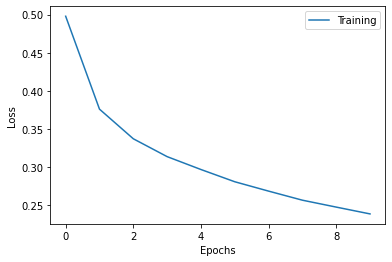

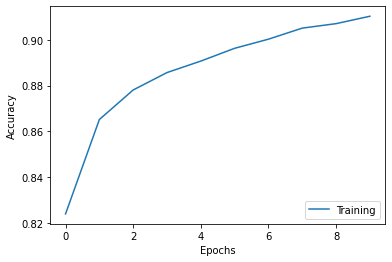

In [15]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(history)

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3458 - accuracy: 0.8769 - 554ms/epoch - 2ms/step

Test accuracy: 0.8769000172615051


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([2.08690366e-07, 8.01104627e-10, 2.15504090e-11, 1.12415215e-07,
       2.50193555e-09, 6.79025397e-05, 6.62870775e-07, 2.30693314e-02,
       1.20536594e-08, 9.76861775e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

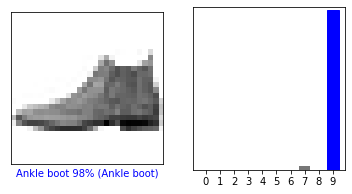

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

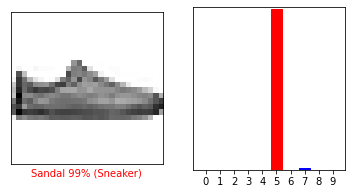

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

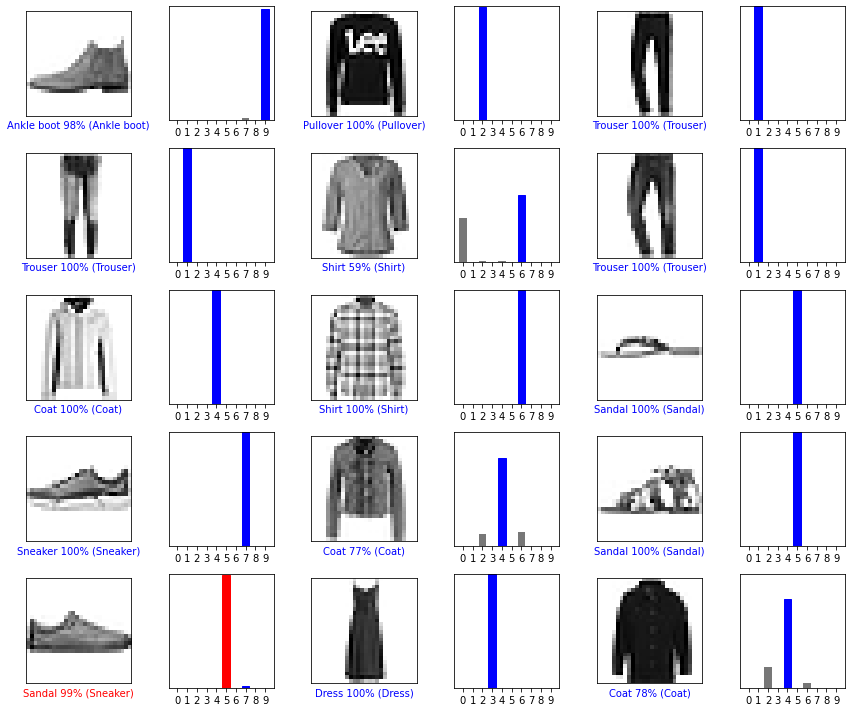

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Checkpoint 만들기

In [27]:
ckpt_path_for_t1 = "checkpoints/training_1/cp.ckpt"
ckpt_dir_for_t1 = os.path.dirname(ckpt_path_for_t1)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path_for_t1,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

In [28]:
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9149
Epoch 1: val_loss improved from inf to 0.35628, saving model to checkpoints/training_1/cp.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2314 - accuracy: 0.9148 - val_loss: 0.3563 - val_accuracy: 0.8739
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.2226 - accuracy: 0.9167
Epoch 2: val_loss did not improve from 0.35628
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2221 - accuracy: 0.9168 - val_loss: 0.3967 - val_accuracy: 0.8691
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9192
Epoch 3: val_loss improved from 0.35628 to 0.34490, saving model to checkpoints/training_1/cp.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2161 - accuracy: 0.9191 - val_loss: 0.3449 - val_accuracy: 0.8828
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - 

In [38]:
!ls {ckpt_dir_for_t1}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


### load Model

In [30]:
latest = tf.train.latest_checkpoint(ckpt_dir_for_t1)
latest

'checkpoints/training_1/cp.ckpt'

In [31]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.load_weights(latest)
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1790 - accuracy: 0.9330
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1753 - accuracy: 0.9351
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1683 - accuracy: 0.9371
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1656 - accuracy: 0.9384
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1608 - accuracy: 0.9398


In [32]:
# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels,verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Restored model, accuracy: 88.91%


### Model 전체 저장하기

In [39]:
model2.save('model2.h5') #h5라는 형식으로 저장

In [34]:
# Recreate the exact same model, including its weights and the optimizer
model3 = tf.keras.models.load_model('model2.h5')

# Show the model architecture
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model plotting

In [35]:
!pip install graphviz

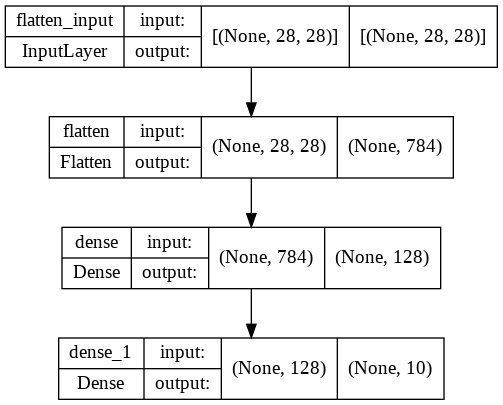

In [37]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)